In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [8]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')


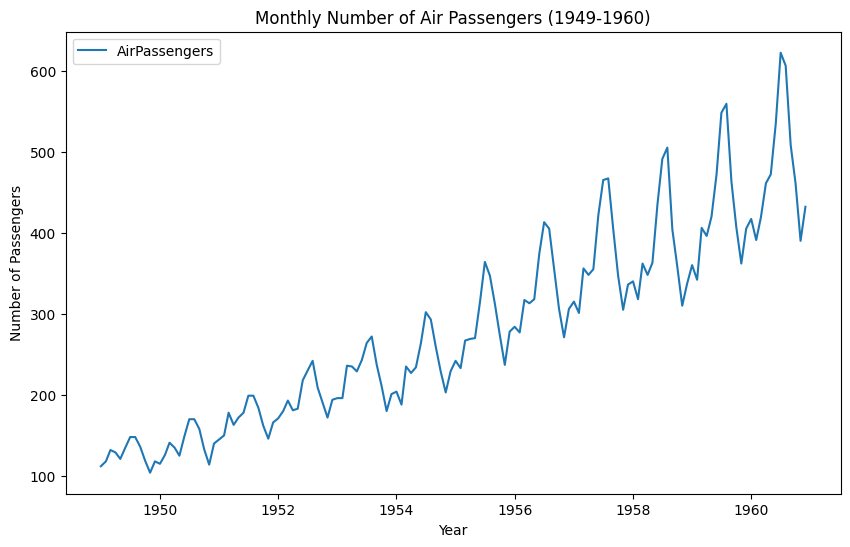

In [9]:
# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='AirPassengers')
plt.title('Monthly Number of Air Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

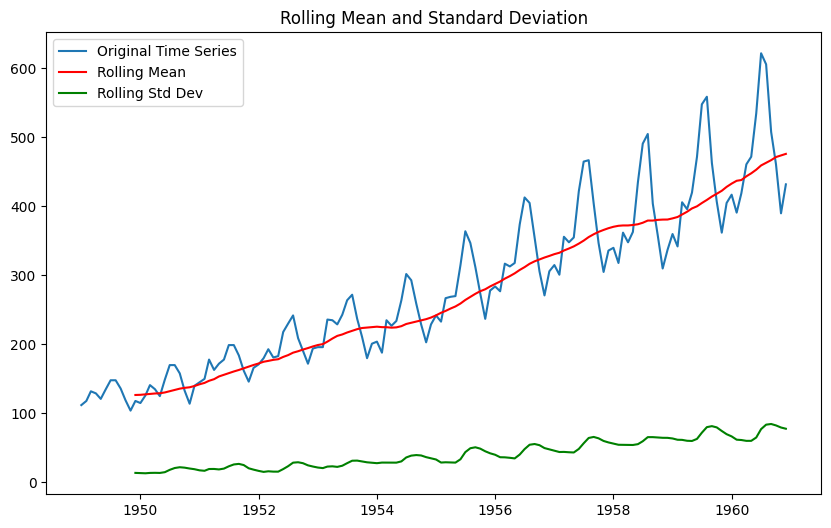

In [10]:
#Check for Stationarity: Using Rolling Mean and Standard Deviation

# Calculate rolling statistics
rolling_mean = data['Passengers'].rolling(window=12).mean() 
rolling_std = data['Passengers'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Original Time Series')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()


1. **Original Time Series (Blue Line)**:
   - The blue line represents the original AirPassengers data, which clearly shows both an **upward trend** and **seasonality**.
   - There is a consistent increase in the number of passengers over time, along with recurring peaks that suggest seasonal variations.

2. **Rolling Mean (Red Line)**:
   - The red line represents the **rolling mean** calculated over a 12-month window.
   - The rolling mean smooths out short-term fluctuations and highlights the **long-term trend**. You can see that it also follows an upward trajectory, which confirms the presence of a significant trend in the dataset.
   - The upward slope of the rolling mean indicates that the mean of the series is **not constant**, which is a key indicator of **non-stationarity**.

3. **Rolling Standard Deviation (Green Line)**:
   - The green line shows the **rolling standard deviation**, also calculated over a 12-month window.
   - The rolling standard deviation remains relatively flat, suggesting that the **variance** of the series does not change significantly over time. However, there are still small fluctuations, especially towards the end of the time series.
   - Despite the relatively flat variance, the upward trend in the rolling mean suggests that the series is still **non-stationary**.

### **Key Insights**:
- **Non-Stationarity**: The non-constant mean (as indicated by the rising rolling mean) confirms that this is a **non-stationary series**. A stationary series should have a constant mean and variance over time.
- **Trend**: The red rolling mean line clearly shows an upward trend in the data, reinforcing the idea that the dataset has an underlying trend that needs to be removed before applying time series forecasting models.
- **Seasonality**: The repeating peaks in the original time series suggest strong seasonality, which will need to be addressed using techniques like seasonal decomposition or seasonal differencing.


In [11]:
# Perform ADF test
adf_test = adfuller(data['Passengers'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# Check critical values
for key, value in adf_test[4].items():
    print(f'Critical Value ({key}): {value}')


ADF Statistic: 0.8153688792060475
p-value: 0.991880243437641
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598


### **Notes on Augmented Dickey-Fuller (ADF) Test Results**

The **Augmented Dickey-Fuller (ADF) test** is used to check for **stationarity** in a time series by testing the null hypothesis that the series has a **unit root** (i.e., it is non-stationary). Here are the key outputs from the test:

1. **ADF Statistic: 0.815**
   - The ADF statistic of **0.815** is **greater than all critical values** (-3.48 at 1%, -2.88 at 5%, -2.58 at 10% levels). This means we cannot reject the null hypothesis that the series is non-stationary.

2. **p-value: 0.991**
   - The **p-value** of **0.991** is much higher than the typical significance levels (0.05 or 0.01). This indicates that the probability of the data being stationary is very low, and we **fail to reject the null hypothesis** of non-stationarity. This confirms that the time series is **non-stationary**.

3. **Critical Values**:
   - The critical values provide thresholds for rejecting the null hypothesis at various confidence levels (1%, 5%, and 10%).
   - Since the ADF statistic is above all critical values, the result supports the conclusion that the series is non-stationary.

### **Conclusion:**
The **ADF test confirms that the time series is non-stationary**, meaning that the mean is not constant and likely has a trend and seasonality. This aligns with what we saw in the plot, where both a trend and seasonality were visually obvious.



## Converting Non Statinary to Stationary Time Series

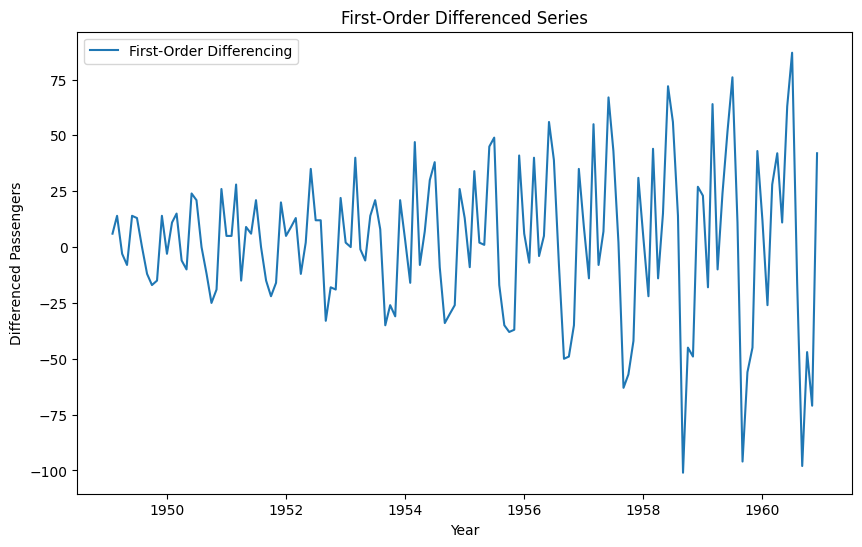

In [ ]:
# Apply first-order differencing
data_diff = data['Passengers'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='First-Order Differencing')
plt.title('First-Order Differenced Series')
plt.xlabel('Year')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()

In [14]:

# Perform ADF test on differenced data
adf_test_diff = adfuller(data_diff)
print(f'ADF Statistic (Differenced): {adf_test_diff[0]}')
print(f'p-value (Differenced): {adf_test_diff[1]}')


ADF Statistic (Differenced): -2.829266824170006
p-value (Differenced): 0.05421329028382468


### **Notes on the First-Order Differencing Plot**

This plot represents the **first-order differenced** series of the **AirPassengers** dataset, which removes the trend and helps convert the non-stationary time series into a stationary one. Here’s an analysis of the plot and the ADF test results:

#### **1. First-Order Differenced Series (Blue Line)**:
- The original time series had a clear upward trend, which is removed by first-order differencing. In this plot, you can see that the values fluctuate around **zero**, meaning the trend has been largely removed.
- This differencing technique helps us focus on the **changes between consecutive months** rather than the actual passenger numbers, stabilizing the mean and addressing the issue of non-stationarity due to the trend.

#### **2. ADF Test After Differencing**:
- **ADF Statistic: -2.829**: This value is **lower than the previous ADF statistic (0.815)**, indicating that the differencing has moved the series closer to stationarity.
- **p-value: 0.054**: Although this p-value is much lower than the original test (0.99), it is **slightly above the standard threshold of 0.05**. This means we are **close to rejecting the null hypothesis**, but not quite there yet.
- **Critical Values**: The ADF statistic is still higher than the **1% (-3.481)**, **5% (-2.884)**, and **10% (-2.578)** critical values, meaning we cannot fully reject the null hypothesis of non-stationarity.

---

### **Key Insights**:
- **Close to Stationarity**: The first-order differencing has done a good job at removing the trend, and the series now fluctuates around zero. However, the p-value is slightly higher than the 0.05 threshold, meaning that the series is not fully stationary yet.
- **Improvement Over Original Series**: This is a significant improvement over the original non-stationary series, but more work may be needed to ensure full stationarity.

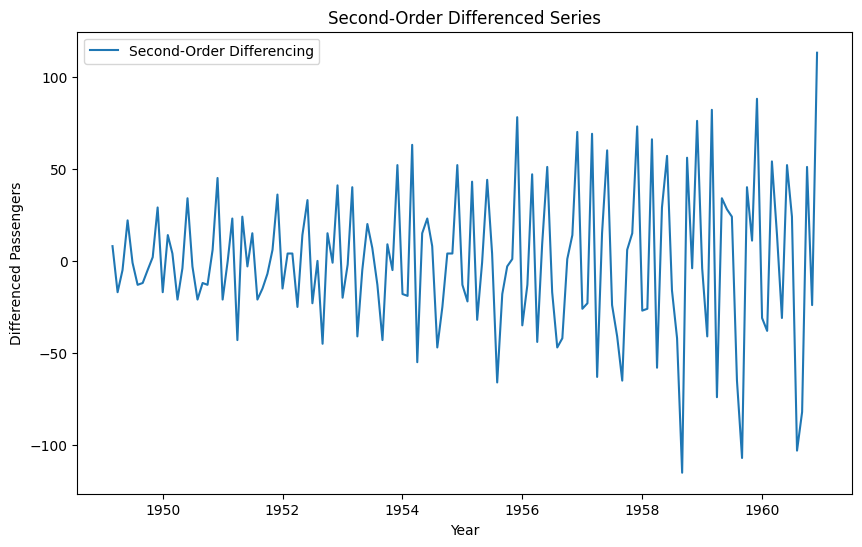

In [15]:
# Apply second-order differencing
data_diff2 = data_diff.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff2, label='Second-Order Differencing')
plt.title('Second-Order Differenced Series')
plt.xlabel('Year')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()

In [16]:

# Perform ADF test on differenced data
adf_test_diff2 = adfuller(data_diff2)
print(f'ADF Statistic (Differenced): {adf_test_diff2[0]}')
print(f'p-value (Differenced): {adf_test_diff2[1]}')


ADF Statistic (Differenced): -16.384231542468502
p-value (Differenced): 2.7328918500142026e-29


### **Notes on the Second-Order Differencing Plot**

This plot shows the **Second-Order Differenced Series** of the AirPassengers dataset, and the results of the ADF test are shown at the bottom of the plot.

#### **1. Second-Order Differencing**:
- In second-order differencing, we perform differencing on a series that has already been differenced once. This is often done when the first-order differencing doesn’t fully achieve stationarity.
- The plot shows that the values still fluctuate around zero, and we can observe that the trend has been completely removed.
- However, there is more **volatility** in this differenced series compared to the first-order differencing. This might not always be desirable, as it could indicate that further differencing introduces more noise into the data.

#### **2. ADF Test Results**:
- **ADF Statistic: -16.38**: The ADF test statistic has significantly decreased compared to the first-order differencing, indicating much stronger evidence against the null hypothesis of non-stationarity.
- **p-value: 2.73e-29**: The p-value is extremely small (practically zero), far below any significance level (such as 0.05 or 0.01), meaning we can confidently reject the null hypothesis of non-stationarity.
- **Conclusion**: The ADF test confirms that the second-order differenced series is **stationary**. The extremely low p-value tells us that the series no longer has a unit root, and the statistical properties such as mean, variance, and autocorrelation are constant over time.

